# 神经网络入门

## 神经网络剖析

In [1]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(32))

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


## 电影分类问题：分类问题

### IMDB数据集

In [2]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 16s 1us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

 ### 准备数据

In [7]:
# 将整数序列编码为二进制矩阵
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 构建网络

输入数据是向量，标签是1和0，带有relu的全连接层，表现更好

In [11]:
# 模型定义
model_imdb = models.Sequential()
model_imdb.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model_imdb.add(layers.Dense(16,activation='relu'))
model_imdb.add(layers.Dense(1,activation='sigmoid'))

In [12]:
# 编译模型，选择损失函数和优化器
model_imdb.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

### 验证方法

In [13]:
# 留出验证集
x_val = x_train[:10000]
part_x_train = x_train[10000:]
y_val = y_train[:10000]
part_y_train = y_train[10000:]

In [17]:
# 训练模型
model_imdb.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model_imdb.fit(part_x_train,
                    part_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 464us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3715 - val_acc: 0.8724
Epoch 2/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.2957 - acc: 0.9047 - val_loss: 0.2990 - val_acc: 0.8908
Epoch 3/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.2160 - acc: 0.9287 - val_loss: 0.3087 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2830 - val_acc: 0.8840
Epoch 5/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.1415 - acc: 0.9542 - val_loss: 0.2863 - val_acc: 0.8854
Epoch 6/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3087 - val_acc: 0.8810
Epoch 7/20
15000/15000 [==============================] - 3s 192us/step - 

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

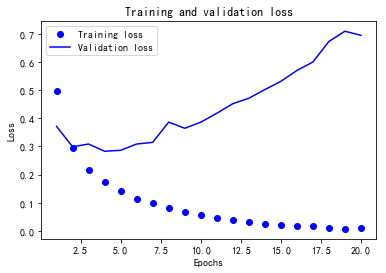

In [19]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label = 'Training loss')# bo 蓝色圆点
plt.plot(epochs,val_loss_values,'b',label='Validation loss')#b 蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

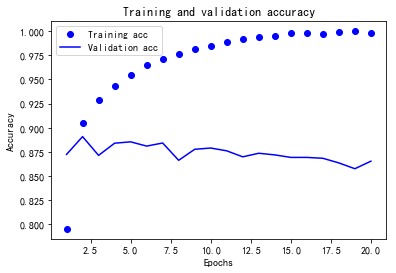

In [20]:
# 绘制训练精度和验证精度
plt.clf()# 清空图像
acc= history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label = 'Training acc')# bo 蓝色圆点
plt.plot(epochs,val_acc,'b',label='Validation acc')#b 蓝色实线
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

可以发现过拟合的现象，因此只需要训练四轮

In [22]:
# 从头开始重新训练一个模型
model_imdb=models.Sequential()
model_imdb.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model_imdb.add(layers.Dense(16,activation='relu'))
model_imdb.add(layers.Dense(1,activation='sigmoid'))
model_imdb.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model_imdb.fit(x_train,y_train,epochs=4,batch_size=512)
results=model_imdb.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 158us/step - loss: 0.4742 - acc: 0.8221
Epoch 2/4
25000/25000 [==============================] - 3s 138us/step - loss: 0.2635 - acc: 0.9101
Epoch 3/4
25000/25000 [==============================] - 4s 163us/step - loss: 0.1986 - acc: 0.9308
Epoch 4/4
25000/25000 [==============================] - 6s 251us/step


In [23]:
results

[0.3233132664299011, 0.8728]

### 使用训练好的网络在新数据集上生成预测结果

In [24]:
model_imdb.predict(x_test)

array([[0.13638178],
       [0.99970746],
       [0.28230274],
       ...,
       [0.07501477],
       [0.04532707],
       [0.4923602 ]], dtype=float32)

## 新闻分类：多分类问题

### 路透社数据集

In [25]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 4s 2us/step


In [26]:
len(train_data)

8982

In [27]:
len(test_data)

2246

In [28]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [30]:
train_labels[10]

3

### 准备数据

In [31]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [32]:
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results

In [33]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [34]:
# 使用内置方法实现独热编码
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [35]:
train_labels[0]

3

### 构建网络

In [36]:
model_reutres = models.Sequential()
model_reutres.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model_reutres.add(layers.Dense(64,activation='relu'))
model_reutres.add(layers.Dense(46,activation='softmax'))

In [37]:
model_reutres.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

### 验证你的方法

In [39]:
x_val = x_train[:1000]
part_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
part_y_train = one_hot_train_labels[1000:]

In [42]:
history = model_reutres.fit(part_x_train,
                           part_y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 194us/step - loss: 0.0870 - acc: 0.9580 - val_loss: 1.3381 - val_acc: 0.7730
Epoch 2/20
7982/7982 [==============================] - 1s 179us/step - loss: 0.0863 - acc: 0.9574 - val_loss: 1.3531 - val_acc: 0.7830
Epoch 3/20
7982/7982 [==============================] - 1s 182us/step - loss: 0.0834 - acc: 0.9593 - val_loss: 1.2749 - val_acc: 0.7910
Epoch 4/20
7982/7982 [==============================] - 1s 179us/step - loss: 0.0818 - acc: 0.9572 - val_loss: 1.3574 - val_acc: 0.7790
Epoch 5/20
7982/7982 [==============================] - 1s 181us/step - loss: 0.0834 - acc: 0.9583 - val_loss: 1.3401 - val_acc: 0.7890
Epoch 6/20
7982/7982 [==============================] - 1s 179us/step - loss: 0.0810 - acc: 0.9599 - val_loss: 1.2924 - val_acc: 0.7880
Epoch 7/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.0803 - acc: 0.9582 - val_loss: 1.3278 - val_acc: 0.7940


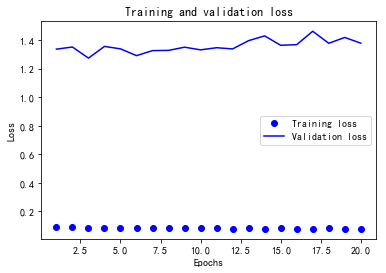

In [43]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label = 'Training loss')# bo 蓝色圆点
plt.plot(epochs,val_loss_values,'b',label='Validation loss')#b 蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

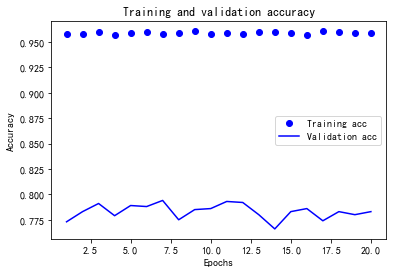

In [44]:
# 绘制训练精度和验证精度
plt.clf()# 清空图像
acc= history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label = 'Training acc')# bo 蓝色圆点
plt.plot(epochs,val_acc,'b',label='Validation acc')#b 蓝色实线
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [45]:
# 从头开始重新训练一个模型
model_reutres=models.Sequential()
model_reutres.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model_reutres.add(layers.Dense(64,activation='relu'))
model_reutres.add(layers.Dense(46,activation='softmax'))
model_reutres.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model_reutres.fit(part_x_train,part_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))
results=model_reutres.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 239us/step - loss: 2.8535 - acc: 0.4022 - val_loss: 1.9506 - val_acc: 0.6340
Epoch 2/9
7982/7982 [==============================] - 1s 181us/step - loss: 1.5744 - acc: 0.6898 - val_loss: 1.3817 - val_acc: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 181us/step - loss: 1.1286 - acc: 0.7676 - val_loss: 1.1845 - val_acc: 0.7390
Epoch 4/9
7982/7982 [==============================] - 1s 182us/step - loss: 0.8774 - acc: 0.8226 - val_loss: 1.0474 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 1s 180us/step - loss: 0.6982 - acc: 0.8559 - val_loss: 0.9800 - val_acc: 0.8030
Epoch 6/9
7982/7982 [==============================] - 1s 184us/step - loss: 0.5531 - acc: 0.8899 - val_loss: 0.9446 - val_acc: 0.7990
Epoch 7/9
7982/7982 [==============================] - 1s 179us/step - loss: 0.4479 - acc: 0.9100 - val_loss: 0.9432 - val_acc: 0.8090
Epoch 8

In [46]:
results

[0.9764161610964252, 0.7920747996703493]

### 在新数据上生成预测结果

In [47]:
predictions = model_reutres.predict(x_test)

In [48]:
predictions[0].shape

(46,)

In [49]:
np.sum(predictions[0])

0.9999998

In [50]:
np.argmax(predictions[0])

3

## 预测房价：回归问题

### 波士顿房价数据集

In [54]:
# 加载房价数据
from keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()

In [55]:
train_data.shape

(404, 13)

In [56]:
test_data.shape

(102, 13)

In [57]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 准备数据

In [58]:
# 数据标准化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

### 构建网络

In [59]:
# 模型定义
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

### 利用K折验证来验证你的方法

In [60]:
# k折验证
import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold {}'.format(i))
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    part_train_data= np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    part_train_targets= np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
    
    model_boston = build_model()
    model_boston.fit(part_train_data,part_train_targets,epochs=num_epochs,batch_size=1,verbose=0)# 静默模式
    val_mse,val_mae=model_boston.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [61]:
all_scores

[2.0893903120909587, 2.282190974396054, 2.899446093209899, 2.3766413986092747]

In [62]:
np.mean(all_scoresscores)

2.4119171945765467

In [65]:
# 保存每折的验证结果
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold {}'.format(i))
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    part_train_data= np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    part_train_targets= np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
    
    model_boston = build_model()
    history = model_boston.fit(part_train_data,part_train_targets,validation_data=(val_data,val_targets),epochs=num_epochs,batch_size=1,verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [68]:
# 计算所有轮次中的k折验证分数平均值
average_mae_history =[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

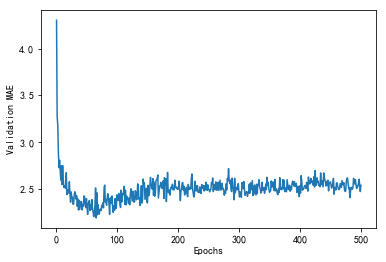

In [69]:
# 绘制验证分数
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

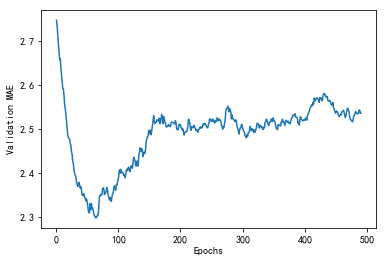

In [70]:
# 绘制验证分数（删除前10个数）
def smooth_curve(points,factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()